# 국가별 음주 데이터 분석


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 데이터 분석에 가장 처음 할일.

In [4]:
file_path = 'C:\\Users\\pwjdg\\바탕 화면\\Data-analysis\\data\\drinks.csv'
df_drinks = pd.read_csv(file_path)

In [6]:
df_drinks.info() # csv 파일의 정보를 읽는다.
# 피처 = 컬럼 = 특징

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


## 각 피처들 정보
country : 국가
beer_servings : 맥주 소비량
spirit_servings : spirit 소비량
wine_servings : 와인 소비량
total_litres_of__pure_alcohol : 총 알콜 소비량
continent : 국가의 대륙 정보

In [9]:
df_drinks.head(10)
# df_drinks[df_drinks["country"] == "South Korea"] # 한국의 정보 가져오기

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


기본 통계 산출하기

In [10]:
df_drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


## 피처 상관 관계 살펴보기

크게 2가지 방법이 있다.

1. 단순 상관 분석
2. 다중 상관 분석

지금 쓸거는 1번이야(단순 상관 분석)

상관 분석 : 두 변수 간의 선형적 관계 표현 ( -1 ~ 1 ) 공분산 비슷(?)

소비량 관련 피처를 이용해서 분석을 진행한다.

In [14]:
# 판다스에서 상관 관계 분석하는 메서드 = corr()
corr = df_drinks[['beer_servings', 'wine_servings']].corr(method = 'pearson')
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


분석 결과 맥주 소비량 | 와인 소비량의 상관 계수는 0.52로 나타남

In [20]:
cols = ['beer_servings',
        'spirit_servings',
        'wine_servings',
        'total_litres_of_pure_alcohol']

corr = df_drinks[cols].corr(method = 'pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


숫자 보단 그림이 좋다.

**seaborn**을 쓸건데

!pip install seaborn

In [22]:
import seaborn as sns

In [28]:
# 시각화 코드는 함수화 추천
def drink_heatmap(cols_view, df, cols):
        '''
        데이터 프레임의 히트맵 시각화 메서드
        :param cols_veiw: 그래프 출력을 위한 cols 정보
        :param df: 데이터 프레임
        :param cols: 피처 정보
        :return: 그래프
        '''

        sns.set(font_scale = 1.5)
        corr = df[cols].corr(method='pearson')
        heatmap = sns.heatmap(corr.values,
                              cbar = True,
                              annot = True,
                              square = True,
                              fmt = '.2f',
                              annot_kws = {'size':15},
                              yticklabels = cols_view,
                              xticklabels = cols_view
                              )
        ## 여기까지 히트맵 설정

       # plt.tight_layout()
        plt.show()

In [27]:
def drink_pairplot(cols_view, df, cols):
    '''
    피처 간의 상관 관계 분석
    :param cols_view: 그래프 출력을 위한 cols 정보
    :param df: 데이터 프레임
    :param cols: 피처
    :return:
    '''

    # 시각화 라이브러리 이용해서 만든 피처 간의 산점도 그래프 출력
    sns.set(style = 'whitegrid', context = 'notebook')
    sns.pairplot(df[cols], height = 2.5)
    plt.show()

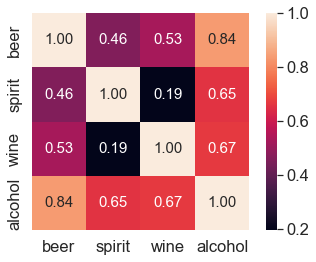

In [29]:
cols_view = ['beer', 'spirit', 'wine', 'alcohol']
drink_heatmap(cols_view, df_drinks, cols)

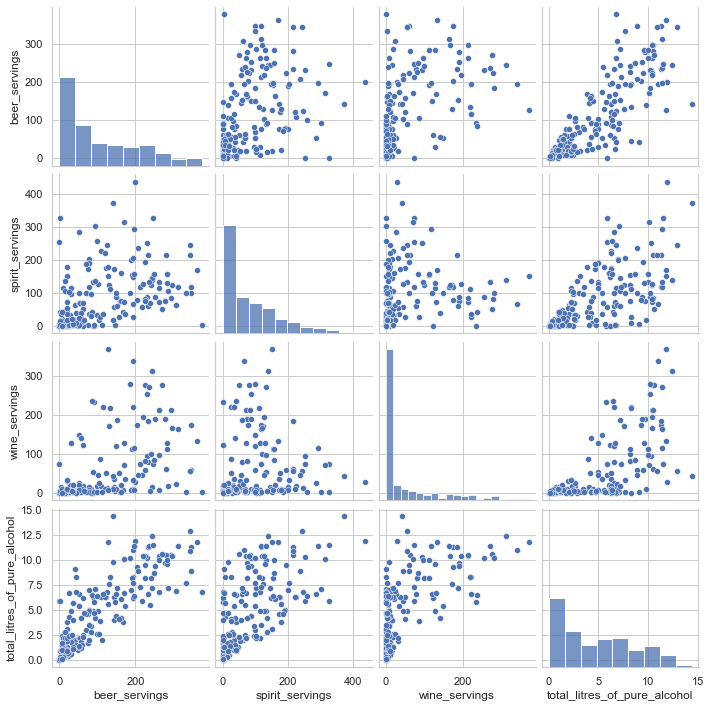

In [30]:
drink_pairplot(cols_view, df_drinks, cols)

## 탐색적 분석하기

continent에 결측 데이터가 있었다. 분석에 앞서 결측 데이터를 전처리해야 나중에 치명적인 오류를 피할 수 있다.
**대륙에 대한 정보가 없는 대륙을 alien 으로 다시 정의 하겠음**
새로 정의 하는 방법 : pandas에 fillna()메서드를 이용

> fillna('str')
결측 데이터를 str값으로 변경해줌

In [31]:
df_drinks['continent'] = df_drinks['continent'].fillna('alien')
df_drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,alien
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


### 전체 대륙 중 alien이 차지하는 비율이 얼마나 되는지 파악하기

In [46]:
# 파이 차트
def show_pie_plot(df, cols):
    '''
    전체 대륙 중 cols가 차지하는 비율 시각화
    :param df: 데이터
    :param cols: 대상 cols
    :return:
    '''

    labels = df[cols].value_counts().index.tolist() # 그래프 라벨 (각 대륙 이름)
    fracs1 = df[cols].value_counts().values.tolist() # 비율에 대한 값

    explode = (0, 0, 0, 0.25, 0, 0) # 조각이 떨어지는 범위
    plt.pie(fracs1, explode=explode, labels= labels, autopct='%.0f%%', shadow=True)
    plt.title("null data to alien")
    plt.show()

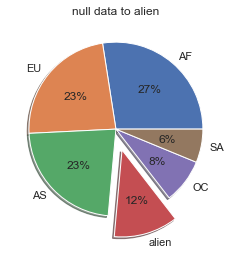

In [47]:
show_pie_plot(df_drinks, 'continent')

### 대륙별 맥주 소비량의 통계적 정보

agg()메서드를 이용해서 대륙 단위로 분석을 수행함.

agg() : apply() 메서드와 거의 동일한 기능을 하지만, apply()에 들어가는 파라미터를 병렬로 설정하여 **그룹에 대한 여러 가지 연산 결과를 동시에 구함**

예시 : apply(x, y, z) 불가능 but agg(x, y, z) 가능
올바른 사용 방법 : apply(x) agg(x, y, z)

In [56]:
result = df_drinks.groupby('continent').beer_servings.agg(['mean', 'min', 'max', 'sum'])
result

,mean,min,max,sum
continent,,,,
AF,61.471698,0,376,3258
AS,37.045455,0,247,1630
EU,193.777778,0,361,8720
OC,89.687500,0,306,1435
SA,175.083333,93,333,2101
alien,145.434783,1,285,3345


In [57]:
# 대륙별 와인 소비량 통계 구하기
wine_result = df_drinks.groupby('continent').wine_servings.agg(['mean', 'min', 'max', 'sum'])
wine_result

,mean,min,max,sum
continent,,,,
AF,16.264151,0,233,862
AS,9.068182,0,123,399
EU,142.222222,0,370,6400
OC,35.625000,0,212,570
SA,62.416667,1,221,749
alien,24.521739,1,100,564


### 전체 평균보다 많은 알코올 섭취하는 대륙 어디인가?

In [60]:
total_mean = df_drinks.total_litres_of_pure_alcohol.mean()
continent_mean = df_drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

continent
EU       8.617778
SA       6.308333
alien    5.995652
Name: total_litres_of_pure_alcohol, dtype: float64


### 가장 많이 알콜을 섭취한 대륙은 어디인가

In [74]:
continent_max = df_drinks.groupby('continent')['total_litres_of_pure_alcohol'].max().idxmax()
continent_max

'EU'

### 대륙별 맥주 소비량 시각화

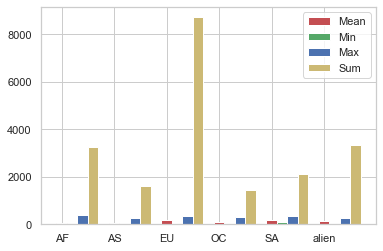

In [87]:
n_group = len(result.index)
mean = result['mean']
mins = result['min']
maxs = result['max']
sums = result['sum']

index = np.arange(n_group)
bar_width = 0.2
# plt.bar(x축, y축 , 막대 넓이, 색상, 라벨)
rects1 = plt.bar(index, mean, bar_width, color = 'r', label = 'Mean')
rects2 = plt.bar(index + bar_width, mins, bar_width, color = 'g', label = 'Min')
rects3 = plt.bar(index + bar_width * 2, maxs, bar_width, color = 'b', label = 'Max')
rects4 = plt.bar(index + bar_width * 3 , sums, bar_width, color = 'y', label = 'Sum')
# index + bar_width * 3 의 의미는 index를 기준으로 얼마나 떨어진 위치에 막대를 그릴 것인가를 나타냄
# 없으면 모든 막대가 겹쳐서 그려짐
plt.xticks(index, result.index)
plt.legend()
plt.show()

과제

1-2의 quantity, item_price 이용해서 상관 관계 ( corr() ) 구하고 히트맵 그리기

질문 : 갠톡
제출 : 갠톡

기간 : 다음 스터디 시작 전 까지